In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [3]:
model = tf.keras.models.load_model('3MergedInput-CNN-Conv3.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '3MergedInput-CNN-Conv3.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Image and Raw only
ripe_number = 14
unripe_number = 8

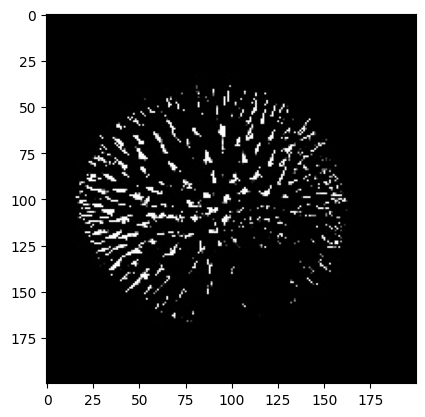

In [ ]:
# Preprocess and Predict Image data
# test_image_path = f"predictions/image/ripe_{ripe_number}.jpg"
test_image_path = f"predictions/image/unripe_{unripe_number}.jpg"
test_image_path = image.load_img(test_image_path)
plt.imshow(test_image_path)

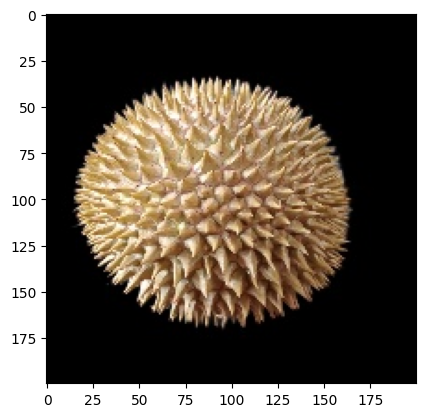

In [ ]:
# Preprocess and Predict Raw data
# test_raw_path = f"predictions/raw/ripe_{ripe_number}.jpg"
test_raw_path = f"predictions/raw/unripe_{unripe_number}.jpg"
test_raw_path = image.load_img(test_raw_path)
plt.imshow(test_raw_path)

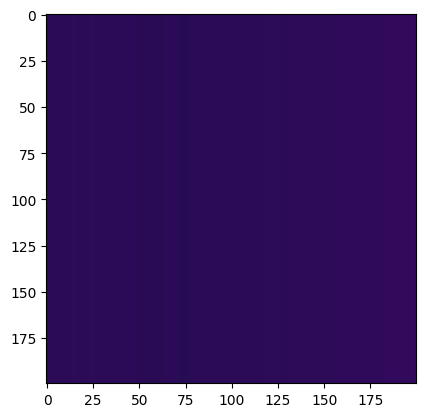

In [ ]:
# Preprocess and Predict Gas data
# test_gas_path = "predictions/gas/ripe_13.jpg"
test_gas_path = "predictions/gas/unripe_25.jpg"
img_gas= image.load_img(test_gas_path)
plt.imshow(img_gas)

In [ ]:
X_image = image.img_to_array(test_image_path)
X_image = np.expand_dims(X_image, axis=0)
X_image = X_image / 255

X_raw = image.img_to_array(test_raw_path)
X_raw = np.expand_dims(X_raw, axis=0)
X_raw = X_raw / 255

X_gas = image.img_to_array(img_gas)
X_gas = np.expand_dims(X_gas, axis=0)
X_gas = X_gas / 255


In [ ]:
predict = model.predict([X_image, X_raw, X_gas])
p = predict[0][0]
p = '{:.10f}'.format(p)
float(p)

NameError: name 'model' is not defined